# Effect of Ford GoBike System record characteristic on riding duration
## by Chunan Lin

## Investigation Overview

The goal of this investigation is to find and discover the features in the Ford GoBike data record that have influence on each ride duration.

## Dataset Overview

The dataset contains 45,3159 individual rides records with multiple features(duration_sec, start_time, end_time,start_station and end_station(id,name,longtitude,latitude), member(birth_year,gender,user_type)). A few data points are removed due to the missing value.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [4]:
# load in the dataset into a pandas dataframe
fordgo2017 = pd.read_csv("2017-fordgobike-tripdata.csv")
fordgo2017 = fordgo2017.dropna()
fordgo2017 = fordgo2017.reset_index(drop=True)
fordgo2017['member_birth_year'] = fordgo2017.member_birth_year.astype('int')
from math import sin, cos, sqrt, atan2,radians
def calculate_distance(df):
    R = 6373.0

    lat1 = radians(df['start_station_latitude'])
    lon1 = radians(df['start_station_longitude'])
    lat2 = radians(df['end_station_latitude'])
    lon2 = radians(df['end_station_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c 
    return distance

fordgo2017 ['distance'] = fordgo2017.apply(calculate_distance,axis=1)

fordgo2017['member_age'] = 2017 - fordgo2017['member_birth_year']
fordgo2017['user_type'] = fordgo2017.user_type.astype('category')
fordgo2017['member_gender'] = fordgo2017.member_gender.astype('category')
age_group_order = ['Under 18','18-35','36-55','Over 55']
def age_grouped(df):
    if df['member_age']>=0 and df['member_age']<=17:
        age_group = 'Under 18'
    if df['member_age']>=18 and df['member_age']<=35:
        age_group = '18-35'
    if df['member_age']>=36 and df['member_age']<=55:
        age_group = '36-55'
    if df['member_age']>55:
        age_group ='Over 55'
    return age_group

fordgo2017['age_group'] = fordgo2017.apply(age_grouped,axis=1)
fordgo2017['age_group'] = fordgo2017.age_group.astype('category',ordered=True, categories = age_group_order)

## Distribution of duration

Duration is a mesurement of time that user spends on riding the bike. Users spends 9 to 16 minutes on using the bike most frequently. There are cases that user borrow the bike for a long period (such as overnight) between 2 hours to even 22 hours.

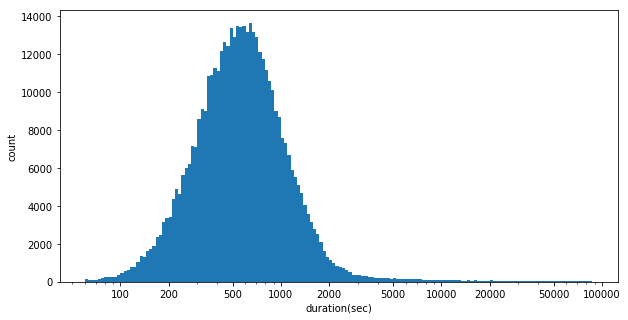

In [5]:
xticks = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
bin_x = 10**np.arange(1.78,np.log10(fordgo2017.duration_sec.max())+0.02,0.02)
plt.figure(figsize=(10,5))
plt.hist(data=fordgo2017, x='duration_sec',bins=bin_x);
plt.xscale('log')
plt.xticks(xticks,xticks)
plt.xlabel('duration(sec)')
plt.ylabel('count');

## Duration vs Distance
Plotting a logarithmic scale of duration and distance, it produces multiple linear relationships. That means there are other variables that may influence the linear relationship between duration and distance. The linear relationship stops at between 1000 seconds to 2000 seconds. That may involve possible ocassions (such as that user forgot to check out their bike)


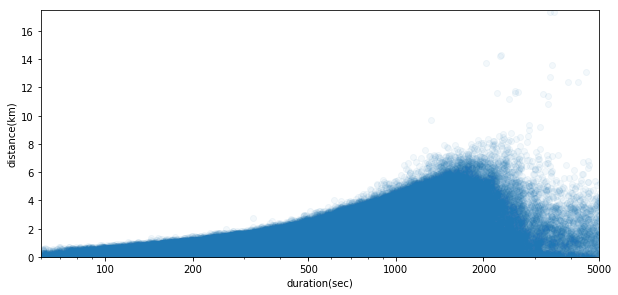

In [18]:
# zoom in the range between 60 and 5000
plt.figure(figsize=(10,10))
xticks = [100,200,500,1000,2000,5000,10000,50000,10000]
plt.subplot(2,1,1)
sb.regplot(data=fordgo2017, x='duration_sec',y='distance',scatter_kws={'alpha' :1/20},fit_reg=False ,y_jitter=0.3)
plt.xscale('log')
plt.xticks(xticks,xticks);
plt.xlim(60,5000)
plt.ylim(0,17.5)
plt.xlabel('duration(sec)')
plt.ylabel('distance(km)');

## Duration vs Distance by user type
It is an interesting fact that user type can be the factor that influence the linear relationship between duration and distance. Customer-type users are more likely to take more time to travel the same distance based on the linear regression fit.



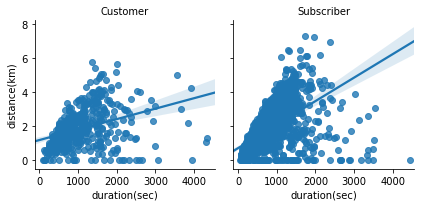

In [17]:
fordgo2017_linear = fordgo2017[fordgo2017.duration_sec <5000]
sample = fordgo2017_linear.sample(5000)
g = sb.FacetGrid(data=sample, col='user_type')
g.map(sb.regplot,'duration_sec','distance')
g.set_titles('{col_name}')
g.set_xlabels('duration(sec)')
g.set_ylabels('distance(km)');
